In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time

def signal(x):
    return np.cos(15*x + 5) - np.sin(5*x - 10)

period = 1.26
x = np.arange(-10,10,0.01)
data = signal(x)

In [23]:
def fourie_row(t,eps):
    omega = 2*np.pi/period
    x = np.arange(0,period,0.01)
    
    a0 = (1/period)*np.trapz(signal(x),x)
    an = []
    bn = []
    n = 1
    while (True):
        an += [(2/period)*np.cos(n*omega*t)*np.trapz(signal(x)*np.cos(n*omega*x),x)]
        bn += [(2/period)*np.sin(n*omega*t)*np.trapz(signal(x)*np.sin(n*omega*x),x)]
        
        if (abs(an[n-1]) < eps or abs(bn[n-1]) < eps ): break
        
        n += 1
        
    return a0 + sum(an) + sum(bn)  

def dft(data):
    N = len(data)
    omega = 1.j*2*np.pi/N
    ampl = []
 
    for k in range(N):
        s = 0
        for n in range(N):
            s += data[n]*np.exp(-omega*k*n)
        ampl += [s]
    return ampl

def rev_dft(data):
    N = len(data)
    omega = 1j*2*np.pi/N
    ampl = []
 
    for n in range(N):
        s = 0
        for k in range(N):
            s += data[k]*np.exp(omega*k*n)/N
        ampl += [s]
    return ampl

def FFT(data):  #не работает
    N = len(data)
    
    if N <= 32:  
        return dft(data)
    else:
        X_even = FFT(data[::2])
        X_odd = FFT(data[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

In [24]:
w = [2*np.pi*k*0.01/period - 50  for k in range(len(data))] #частотная ось

Вычисление заняло 12.904482400000006 секунд


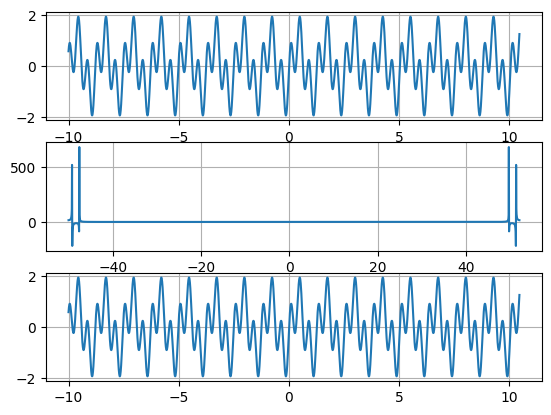

In [25]:
plt.subplot(3,1,1)
plt.plot(x,data)
plt.grid()

tic = time.perf_counter() 
plt.subplot(3,1,2)
plt.plot(w,dft(data))
plt.grid()

plt.subplot(3,1,3)
plt.plot(x,rev_dft(dft(data)))
plt.grid()
toc = time.perf_counter() 

print("Вычисление заняло", toc - tic ,"секунд")

TypeError: slice indices must be integers or None or have an __index__ method

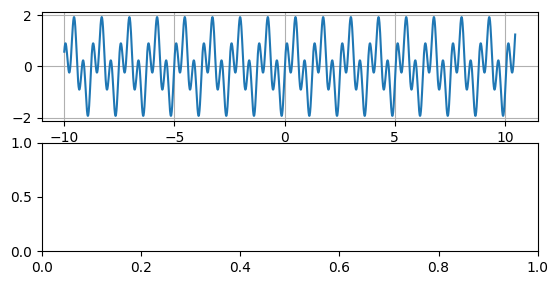

In [26]:
plt.subplot(3,1,1)
plt.plot(x,data)
plt.grid()

tic = time.perf_counter() 
plt.subplot(3,1,2)
plt.plot(w,FFT(data))   #не работает
plt.grid()

toc = time.perf_counter() 

print("Вычисление заняло", toc - tic ,"секунд")